In [17]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist

In [2]:
%config IPCompleter.greedy=True

In [3]:
df = pd.read_csv('~/Master Thesis/Data/iris.csv')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Encode String Attribute to Integer**

In [5]:
enc = LabelEncoder()
enc.fit(df['species'])
df['species']= enc.transform(df['species'])
#print(np.array(df["species"]))

**Principal Component Analysis for Dimentionality Reduction**

In [6]:
pca = PCA(n_components=3)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
df_3d=pca.transform(df)

In [8]:
df_3d

array([[-2.86550669e+00,  3.02780442e-01,  4.84897211e-02],
       [-2.89321339e+00, -1.76987146e-01, -1.68798182e-01],
       [-3.05574910e+00, -1.68006289e-01,  5.65424149e-02],
       [-2.92124902e+00, -3.25027211e-01,  9.80010810e-03],
       [-2.90675140e+00,  3.02332724e-01,  1.53720302e-01],
       [-2.48899988e+00,  7.39727187e-01,  2.00679240e-01],
       [-2.99106535e+00, -1.16739834e-01,  2.50385821e-01],
       [-2.81105291e+00,  1.55635814e-01,  1.66268489e-02],
       [-3.05248032e+00, -5.89687583e-01, -9.28733240e-03],
       [-2.85470148e+00, -1.11633294e-01, -1.64955858e-01],
       [-2.70085679e+00,  6.36298840e-01,  2.34535897e-02],
       [-2.79784383e+00,  8.04346801e-03,  8.99945580e-02],
       [-2.96034027e+00, -2.39025333e-01, -1.67059861e-01],
       [-3.36757216e+00, -5.53686579e-01,  9.81963025e-02],
       [-2.83079955e+00,  1.14659075e+00,  7.49186344e-02],
       [-2.58796715e+00,  1.30810539e+00,  4.03602440e-01],
       [-2.80918503e+00,  7.79232365e-01

In [9]:
sample = df_3d

**Elbow Implimentation with Cluster Seperation Index**

*Reference : 
*

In [47]:
cluster_seperation={}
K = range(2,10)
for k in K :
    cluster_seperation[k]=0
    kmeansModel = KMeans(n_clusters=k)
    labels= kmeansModel.fit_predict(sample)
    centers = kmeansModel.cluster_centers_
    sample_transformed = kmeansModel.fit_transform(sample)
    #print("Centers = "+str(centers))
    #print("pdist = "+str(pdist(centers)))
    pair_dist=pdist(centers)
    avg_dist=pair_dist.sum()/len(pair_dist)
    print("Avg dist = "+str(avg_dist))
    cluster_seperation[k]=avg_dist
print("Clsuter seperation ="+str(cluster_seperation))

Avg dist = 4.227718689593608
Avg dist = 3.4740301507129794
Avg dist = 2.980900230148642
Avg dist = 2.903136933592992
Avg dist = 3.182784492543141
Avg dist = 3.070490492177961
Avg dist = 2.9039394974419466
Avg dist = 2.835155560565595
Clsuter seperation ={2: 4.227718689593608, 3: 3.4740301507129794, 4: 2.980900230148642, 5: 2.903136933592992, 6: 3.182784492543141, 7: 3.070490492177961, 8: 2.9039394974419466, 9: 2.835155560565595}


**Ploting Elbow**

In [48]:
SSE_array=[]
slope=[]
for key,value in cluster_seperation.items():
    SSE_array.append(value)
print(SSE_array)

#Calculate slope of each line
for p in range(1,8):
    s= (SSE_array[p]-SSE_array[p-1])
    slope.append([p+2,s])
slope

[4.227718689593608, 3.4740301507129794, 2.980900230148642, 2.903136933592992, 3.182784492543141, 3.070490492177961, 2.9039394974419466, 2.835155560565595]


[[3, -0.7536885388806289],
 [4, -0.49312992056433735],
 [5, -0.07776329655564984],
 [6, 0.27964755895014903],
 [7, -0.11229400036518022],
 [8, -0.16655099473601442],
 [9, -0.06878393687635143]]

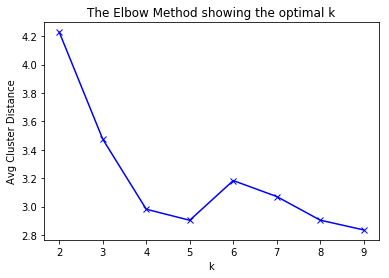

In [49]:
plt.plot(K,SSE_array,'bx-')
plt.xlabel('k')
plt.ylabel('Avg Cluster Distance')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [50]:
slope

[[3, -0.7536885388806289],
 [4, -0.49312992056433735],
 [5, -0.07776329655564984],
 [6, 0.27964755895014903],
 [7, -0.11229400036518022],
 [8, -0.16655099473601442],
 [9, -0.06878393687635143]]

In [51]:
#chose the value after which there is a reduction in gain(rather loss)
for a in range(0,6):
    change_slope=(slope[a])[-1] - (slope[a+1])[-1]
    if change_slope > 0:
        print('Optimal Number of Clusters = '+str((slope[a][0])-1))

Optimal Number of Clusters = 5
Optimal Number of Clusters = 6
